# **04 - LDA and QDA for Classification**

Discriminant analysis encompasses methods that can be used for both classification and dimensionality reduction. **Linear discriminant analysis (LDA)** is particularly popular because it is both a classifier and a dimensionality reduction technique. Despite its simplicity, LDA often produces robust, decent, and interpretable classification results. When tackling real-world classification problems, LDA is often the first and benchmarking method before other more complicated and flexible ones are employed. **Quadratic discriminant analysis (QDA)** is a variant of LDA that allows for non-linear separation of data.

## Linear Discriminant Analysis for Classification

LDA assumes that all classes are linearly separable and according to this multiple linear discrimination function representing several hyperplanes in the feature space are created to distinguish the classes. If there are two classes then the LDA draws one hyperplane and projects the data onto this hyperplane in such a way as to maximize the separation of the two categories. This hyperplane is created according to the two criteria considered simultaneously:

* Maximizing the distance between the means of two classes;
* Minimizing the variation between each category.

Suppose that $Y \in \{1, ..., K\}$ is assigned a prior $\hat{\pi_{k}}$ such that $\sum_{i=1}^k \hat{\pi_{k}} = 1$. According to Bayes’ rule, the posterior probability is

$$
P(Y=k |X=x)=\frac{f_{k}(x)\pi_{k}}{\sum_{i=1}^{K}f_{i}(x)\pi_{i}}
$$


where $f_{k}(x)$ is the density of $X$ conditioned on $k$. The Bayes Classifier can be expessed as:

$$
h^{*}(x) = argmax_{k}\{P(Y=k|X=x)\} = argmax_{k}\delta_{k}(x)
$$

For we assume that the random variable $X$ is a vector $X=(X_1,X_2,...,X_k)$ which is drawn from a *multivariate Gaussian* with class-specific mean vector and a common covariance matrix $\Sigma \ (i.e. \Sigma_{k} = \Sigma, \forall k)$. In other words the covariance matrix is common to all K classes: $Cov(X)=\Sigma$ of shape $d$x$d$.

Since $x$ follows a multivariate Gaussian distribution, the probability $P(X=x|Y=k)$ is given by: ($\mu_k$ is the mean of inputs for category $k$)

$$
f_k(x)=\frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k))
$$

Then we can find the posterior distribution as:
 
$$
P(Y=k |X=x)=\frac{f_{k}(x)\pi_{k}}{P(X=x)} = C \cdot f_{k}(x)\pi_{k}
$$

Since $P(X=x)$ does not depend on $k$ so we write it as a constant. We will now proceed to expand and simplify the algebra, putting all constant terms into $C,C^{'},C{''}$ etc..

$$
\begin{align*} 
p_{k}(x) = &P(Y=k |X=x)=\frac{f_{k}(x)\pi_{k}}{P(X=x)} = C \cdot f_{k}(x)\pi_{k} \\
&=C \cdot \pi_{k} \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_k)^{T}\Sigma^{-1}(x-\mu_k)) \\
&=C^{'} \cdot \pi_{k} exp(-\frac{1}{2}(x-\mu_k)^{T}\Sigma^{-1}(x-\mu_k))
\end{align*} 
$$

Take the log of both sides:

$$
\begin{align*} 
logp_{k}(x) &=log(C^{'} \cdot \pi_{k} exp(-\frac{1}{2}(x-\mu_k)^{T}\Sigma^{-1}(x-\mu_k))) \\
&= logC^{'} + log\pi_k -\frac{1}{2}(x-\mu_k)^{T}\Sigma^{-1}(x-\mu_k) \\
&= logC^{'} + log\pi_k -\frac{1}{2}[(x^{T}\Sigma^{-1}x+\mu_{k}^{T}\Sigma^{-1}\mu_{k}]+x^{T}\Sigma^{-1}\mu_{k} \\
&= C^{''} + log\pi_k -\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}+x^{T}\Sigma^{-1}\mu_{k} \\
\end{align*} 
$$

And so the objective function, sometimes called the linear discriminant function or linear score function is:

$$
\delta_{k} = log\pi_k -\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}+x^{T}\Sigma^{-1}\mu_{k} \\
$$

Which means that given an input $x$ we predict the class with the highest value of $\delta_{k}(x)$.

To find the Dicision Boundary, we will set $P(Y=k|X=x) = P(Y=l|X=x)$ which is $\delta_{k}(x) = \delta_{l}(x)$:

$$
log\pi_k -\frac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}+x^{T}\Sigma^{-1}\mu_{k} =
log\pi_l -\frac{1}{2}\mu_{l}^{T}\Sigma^{-1}\mu_{l}+x^{T}\Sigma^{-1}\mu_{l} \\
log\frac{\pi_{k}}{\pi_{l}} -\underbrace{\frac{1}{2}(\mu_{k}-\mu_{l})^{T}\Sigma^{-1}(\mu_{k}-\mu_{l})}_{Constant}+\underbrace{x^{T}\Sigma^{-1}(\mu_{k}-\mu_{l})}_{Linear \ in \ x} = 0 \\
\Rightarrow a^{T}x + b = 0
$$

Which is a linear function in $x$ - this explains why the decision boundaries are linear - hence the name Linear Discriminant Analysis.

## Quadratic Discrimination Analysis for Classification

LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution with a class-specific mean vector, but a covariance matrix that is common to all $K$ classes. **Quadratic discriminant analysis** provides an alternative approach by assuming that each class has its **own covariance matrix $\Sigma_{k}$**.

To derive the quadratic score function, we return to the previous derivation, but now $\Sigma_{k}$ is a function of $k$, so we cannot push it into the constant anymore.

$$
p_{k}(x) = \pi_{k}\frac{1}{(2\pi)^{d/2}|\Sigma_{k}|^{1/2}}exp(-\frac{1}{2}(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k)) \\
$$

$$
\begin{align*} 
logp_{k}(x) &= C +log\pi_{k} - \frac{1}{2}log|\Sigma_{k}|-\frac{1}{2}(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k) \\
&= C +log\pi_{k} - \frac{1}{2}log|\Sigma_{k}| -\frac{1}{2}x^{T}\Sigma_{k}^{-1}x +x^{T}\Sigma_{k}^{-1}\mu_{k} -\frac{1}{2}\mu_{k}^{T}\Sigma_{k}^{-1}\mu_{k}
\end{align*} 
$$

Which is a quadratic function of x. Under this less restrictive assumption, the classifier assigns an observation X=x to the class for which the quadratic score function is the largest:

$$
\delta_{k}(x) = log\pi_k- \frac{1}{2}log|\Sigma_{k}| -\frac{1}{2}(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k) \\
$$

To find the Quadratic Dicision Boundary, we will set $P(Y=k|X=x) = P(Y=l|X=x)$ which is $\delta_{k}(x) = \delta_{l}(x)$:

$$
log\pi_k- \frac{1}{2}log|\Sigma_{k}| -\frac{1}{2}(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k) = 
log\pi_l- \frac{1}{2}log|\Sigma_{l}| -\frac{1}{2}(x-\mu_l)^{T}\Sigma_{l}^{-1}(x-\mu_l) \\
\frac{1}{2}x^{T}\underbrace{(\Sigma_{l}-\Sigma_{k})}_{A}x+\underbrace{(\mu_{k}^{T}\Sigma_{k}^{-1}-\mu_{l}^{T}\Sigma_{l}^{-1})}_{b^{T}}x +\underbrace{\frac{1}{2}(\mu_{k}-\mu_{l})^{T}\Sigma^{-1}(\mu_{k}-\mu_{l}) + log(\frac{\pi_{l}}{\pi_{k}}) + log(\frac{|\Sigma_{k}|^{1/2}}{|\Sigma_{l}|^{1/2}})}_{c} = 0 \\
\Rightarrow x^{T}Ax + b^{T}x + c = 0
$$

 ###  Case 1 : When $\Sigma_{k} = I$

We first concider the case that $\Sigma_{k} = I, \forall k$. This is the case where each distribution is spherical, around
the mean point. Then we can have:

$$
\delta_{k}(x) = - \frac{1}{2}log|I| + log\pi_k -\frac{1}{2}(x-\mu_k)^{T}I(x-\mu_k) \\
$$

Where $log(|I|) = log(1) = 0$ and $(x-\mu_k)^{T}I(x-\mu_k) = (x-\mu_k)^{T}(x-\mu_k)$ is the **Squared Euclidean Distance** between two points $x$ and $\mu_{k}$.

Thus under this condition (i.e. $\Sigma = I$) , a new point can be classified by **its distance from the center of a class**, adjusted by some prior. Further, for two-class problem with equal prior, the discriminating function would be the perpendicular bisector of the 2-class’s means.

 ###  Case 2 : When $\Sigma_{k} \neq I$
 
Since $\Sigma_{k}$ is a symmetric matrix $\Sigma_{k} = \Sigma_{k}^{T}$, by using the **Singular Value Decomposition (SVD)** of $\Sigma_{k}$, we can get:

$$
\Sigma_{k} = U_{k}S_{k}U_{k}^{T} \\
\Sigma_{k}^{-1} = (U_{k}S_{k}U_{k}^{T})^{-1} = U_{k}S_{k}^{-1}U_{k}^{T}\\
$$

Then,

$$
\begin{align*} 
(x-\mu_k)^{T}\Sigma_{k}^{-1}(x-\mu_k) &= (x-\mu_k)^{T}U_{k}S_{k}^{-1}U_{k}^{T}(x-\mu_k) \\
&= (U_{k}^{T}x-U_{k}^{T}\mu_k)^{T}S_{k}^{-1}(U_{k}^{T}x-U_{k}^{T}\mu_k) \\
&= (U_{k}^{T}x-U_{k}^{T}\mu_k)^{T}S_{k}^{-\frac{1}{2}}S_{k}^{-\frac{1}{2}}(U_{k}^{T}x-U_{k}^{T}\mu_k) \\
&= (S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k)^{T}I(S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k) \\
&= (S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k)^{T}(S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k) \\
\end{align*} 
$$

Which is also known as the **Mahalanobis distance**.

Think of $S_{k}^{-\frac{1}{2}}U_{k}^{T}$ as a linear transformation that takes points in class $k$ and distributes them spherically around a point, like in Case 1. Thus when we are given a new point, we can apply the modified $\delta_{k}$ values to calculate $h^{*}(x)$. After applying the singular value decomposition, $\Sigma_{k}^{-1}$ is considered to be an identity matrix such that:

$$
\delta_{k}(x) = - \frac{1}{2}log|I| + log\pi_k -\frac{1}{2}(S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k)^{T}(S_{k}^{-\frac{1}{2}}U_{k}^{T}x-S_{k}^{-\frac{1}{2}}U_{k}^{T}\mu_k) \\
$$

Where $log(|I|) = log(1) = 0$

The difference between Case 1 and Case 2 (i.e. the difference between using the **Euclidean and Mahalanobis distance**) can be seen in the illustration below:

<img src="04_images/4_Euclidean_and_Mahalanobis_distance.gif" width=600px/>

## LDA and QDA in practice

In practice we don’t know the parameters of Gaussian and will need to estimate them using our training data.

$$ \hat{\pi_{k}} = \hat{P}(y=k) = \frac{n_{k}}{n} $$

where $n_{k}$ is the number of class $k$ observations.

$$\hat{\mu_{k}} = \frac{1}{n_{k}}\sum_{i:y_{i}=k}x_{i}$$

$$\hat{\Sigma_{k}} = \frac{1}{n_{k}-k}\sum_{i:y_{i}=k}(x_{i}-\hat{\mu_{k}})(x_{i}-\hat{\mu_{k}})^{T}$$

If we wish to use LDA we must calculate a **common covariance**, so we average all the covariances e.g.

$$ \Sigma = \frac{\sum_{r=1}^k(n_{r}\Sigma_{r})}{\sum_{r=1}^k n_{r}} $$

Where:

* $n_{r}$ is the number of data points in class $r$. 

* $\Sigma_{r}$ is the covariance of class $r$ and $n$ is the total number of data points.

* $k$ is the number of classes.

## Implementing Linear Discriminant Analysis from Scikit-learn

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['SepalLengthCm'] = pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm'] = pd.to_numeric(iris['SepalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

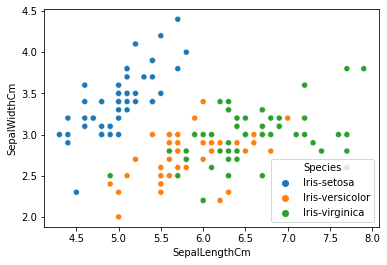

In [4]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)

In [7]:
df1 = iris[['SepalLengthCm', 'SepalWidthCm','Species']]
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_data,y_labels)

LinearDiscriminantAnalysis()

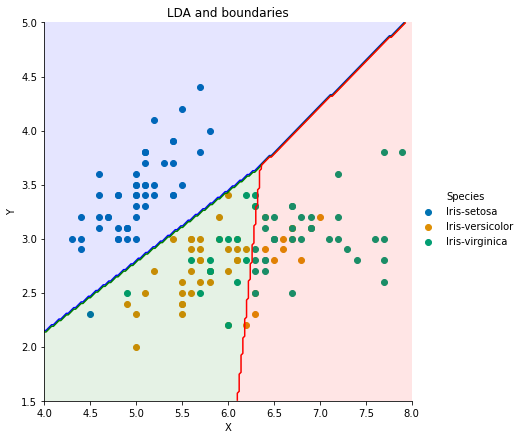

In [9]:
# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(iris, hue="Species", height=6, palette = 'colorblind') .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm',)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [lda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('LDA and boundaries')

plt.show()

In [10]:
#Sklearn accuracy
display(lda.score(X_data,y_labels))

0.8

## Implementing Quadratic Discriminant Analysis from Scikit-learn

In [11]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_data,y_labels)

QuadraticDiscriminantAnalysis(store_covariance=True)

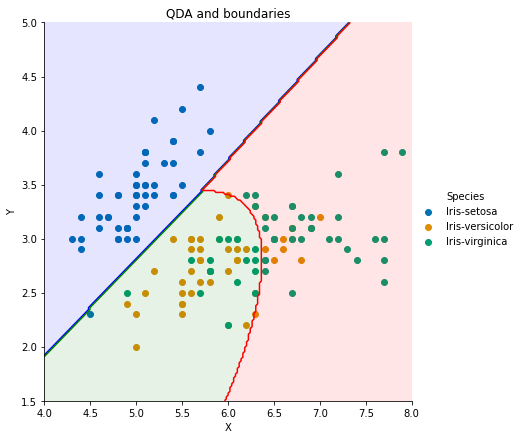

In [20]:
# Our 2-dimensional distribution will be over variables X and Y
N = 200
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(iris, hue="Species", height=6, palette = 'colorblind') .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm',)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [qda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('X')
my_ax.set_ylabel('Y')
my_ax.set_title('QDA and boundaries')

plt.show()

In [13]:
#Sklearn accuracy
display(qda.score(X_data,y_labels))

0.8

## Reference

[1] $\ \ \ \$ Sicotte, X. B. (2018, June 22). Xavier Bourret Sicotte. Linear and Quadratic Discriminant Analysis - Data Blog. https://xavierbourretsicotte.github.io/LDA_QDA.html.